## Blue Skies Space assessment

Attached you will find a csv with the position of a satellite in the Geocentric Celestial Reference System (GCRS), given as Right Ascension (RA), Declination (Dec), and Distance, over the course of a day. We want you to provide us with a python script that can report/display the times when a ground station can observe the satellite. The ground station is located at a latitude of 78.7199 deg and longitude of 20.3493 deg, and can see a satellite when it is between 10-85deg above the horizon. 


In [86]:
import pandas as pd
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, GCRS
from astropy.visualization import astropy_mpl_style

In [106]:
# Let's look at the file
# Changing columns names to 
# shorter ones for simplicity

cheops_data = pd.read_csv('cheops_position_data_2024_09_11.csv')
cheops_data.rename(columns={"Time (iso)": "Time", 
                            "RA (GCRS) [deg]": "RA",
                            "Dec (GCRS) [deg]": "Dec",
                            "Distance (GCRS) [km]": "Dist"
                            }, inplace=True)
cheops_data.head()


,Time,RA,Dec,Dist
0,2024-09-11 00:00:00.000,87.958413,-39.063465,7067.917061
1,2024-09-11 00:01:00.000,87.126150,-35.471240,7067.734122
2,2024-09-11 00:02:00.000,86.365167,-31.873315,7067.554447
3,2024-09-11 00:03:00.000,85.661449,-28.270740,7067.376566
4,2024-09-11 00:04:00.000,85.003812,-24.664359,7067.199130


In [117]:
# Define station location on Earth
station = EarthLocation(lat=78.7199*u.deg, lon=20.3493*u.deg) # Assuming height = 0
# utcoffset = 1*u.hour  # The station is on Svalbard islands

In [118]:
cheops_data['Alt'] = None
cheops_data['Az'] = None
# cheops_data['Local time'] = None

for index, row in cheops_data.iterrows():
    RA = row['RA']
    Dec = row['Dec']
    dist = row['Dist']
    time = Time(row['Time'], scale='utc')
    # time = time+2*u.hour

    # cheops_GCRS = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg, obstime=time, frame='gcrs') # Representation of sky object in GCRS frame
    cheops_GCRS = GCRS(ra=RA*u.deg, dec=Dec*u.deg, distance=dist*u.km, obstime=time)
    AltAz_frame = AltAz(location=station, obstime=time) # Reference frame of the station
    cheops_AltAz = cheops_GCRS.transform_to(AltAz_frame) # Transform from GCRS to Station frame of ref

    # cheops_data.at[index, 'UTC time'] = str(utc_time)
    cheops_data.at[index, 'Alt'] = cheops_AltAz.alt.degree
    cheops_data.at[index, 'Az'] = cheops_AltAz.az.degree


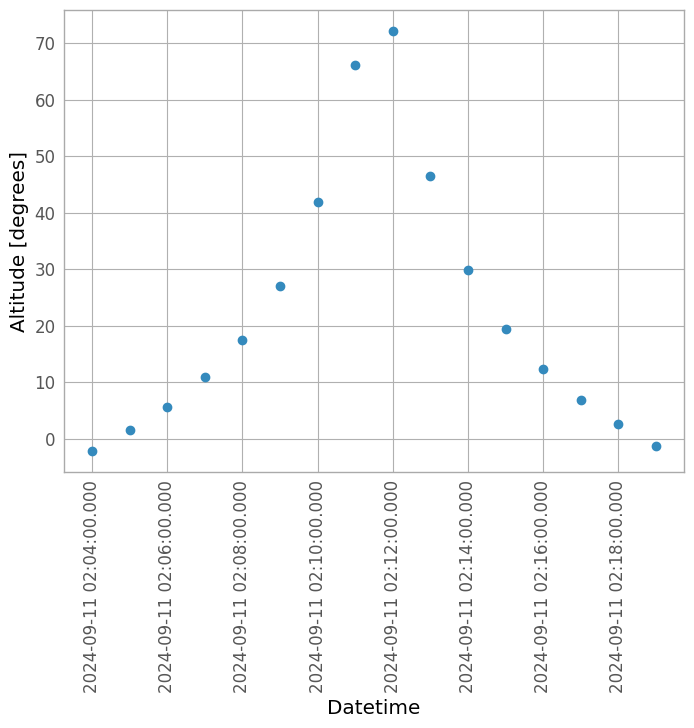

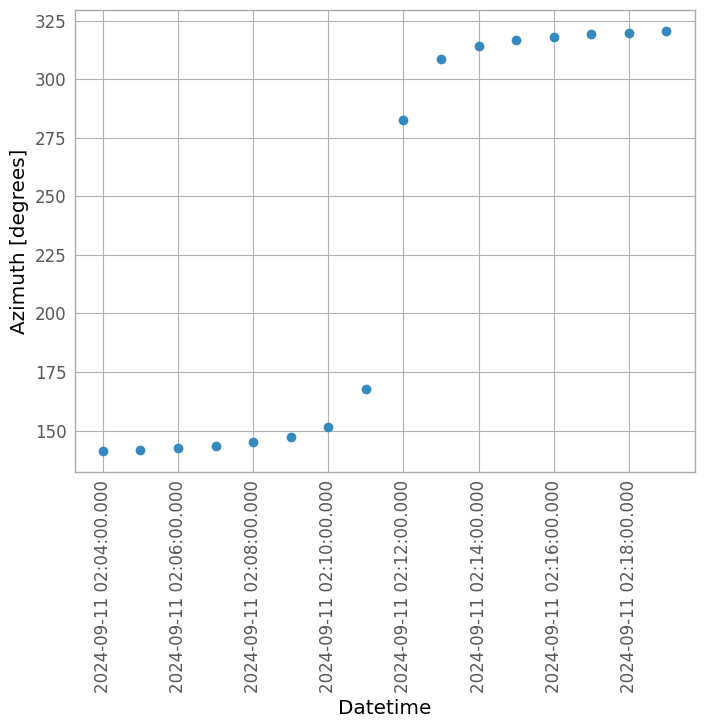

In [122]:
start = 124
end = 140
step = 2

plt.style.use(astropy_mpl_style)

# plt.figure()
# plt.scatter(cheops_data['Time (iso)'][start:end], cheops_data['RA (GCRS) [deg]'][start:end])
# plt.xticks(cheops_data['Time (iso)'][start:end][::step],  rotation='vertical')
# plt.xlabel('Datetime')
# plt.ylabel('RA (GCRS) [degrees]')
# plt.show()

# plt.figure()
# plt.scatter(cheops_data['Time (iso)'][start:end], cheops_data['Dec (GCRS) [deg]'][start:end])
# plt.xticks(cheops_data['Time (iso)'][start:end][::step],  rotation='vertical')
# plt.xlabel('Datetime')
# plt.ylabel('Dec (GCRS) [degrees]')
# plt.show()

plt.figure()
plt.scatter(cheops_data['Time'][start:end], cheops_data['Alt'][start:end])
plt.xticks(cheops_data['Time'][start:end][::step],  rotation='vertical')
plt.xlabel('Datetime')
plt.ylabel('Altitude [degrees]')
plt.show()

plt.figure()
plt.scatter(cheops_data['Time'][start:end], cheops_data['Az'][start:end])
plt.xticks(cheops_data['Time'][start:end][::step],  rotation='vertical')
plt.xlabel('Datetime')
plt.ylabel('Azimuth [degrees]')
plt.show()
